# Netflix Data Analysis

The aim while analyzing the data is to generate insights that can help in deciding;<br> -Which type of shows or movies to produce <br> -The growth areas of the business in different countries.

## Steps 
1. Importing Libraries
2. Loading the dataset:
         Load Data
         Undersranding the structure of the data
3. Data Cleaning:
        Changing data types
        Deleting redundant columns.
        Cleaning individual columns by filling NaN values and dropping.
        Some Transformations
4. Analysing and Data Visualization: 
        Statistical analysis
        Visualization
5. Word Cloud:
        Country
        Title

# <center>1. Importing Libraries</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# <center>2. Loading The Dataset</center>
The data is converted to csv in order to read faster and then loaded. The data has 8807 rows × 12 columns.
<br>We see there are errors in our data, such as NaN values.

The cast, country and director have more than one values within them; which are seperated by the comma delimiter.

In [2]:
df = pd.read_csv('Netflix data.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


The info() function is used to give us a snapshot of the type of data that is in our DataFrame and so that we are able to change data into proper data types and also to know the specific number of null values in each column. <br>Rating has 4 null values, duration has 3 null values ; <br>Whereas cast,country and director has significant number of cells with null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We plot a heatmap of the null values.

We see that the Director, cast and country columns need to be cleaned.
    Normally a sample size of over 100 is quite good. But in our case, Removing the NaN Values in the rows;(by drop.na) removed a significant number of Tv shows leading the data to being biased.
    
We will however drop the director and cast columns, as they are not significant in our study now. The country column which is significant, the null values shall be filled.



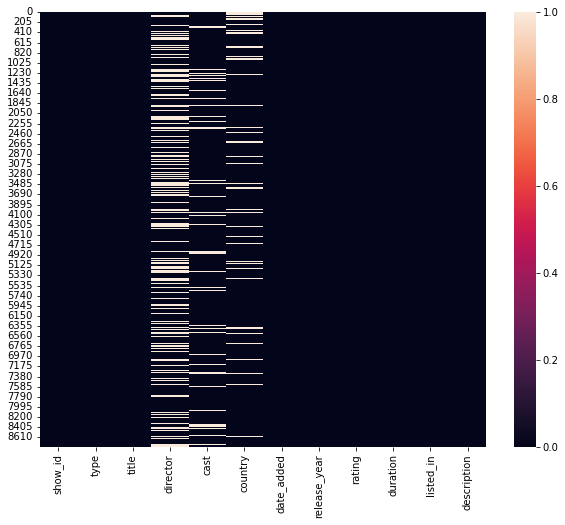

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna());

The distribution of Tv shows and Movie before manipulation of the data. 

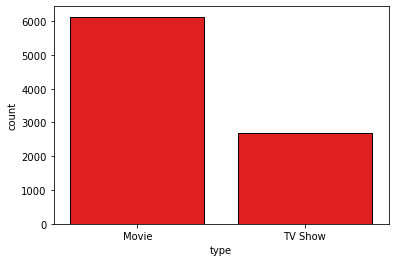

In [5]:
sns.countplot(x= 'type', data=df, color='Red', edgecolor='black');

Top ten genres of the content listed, present in Netflix.

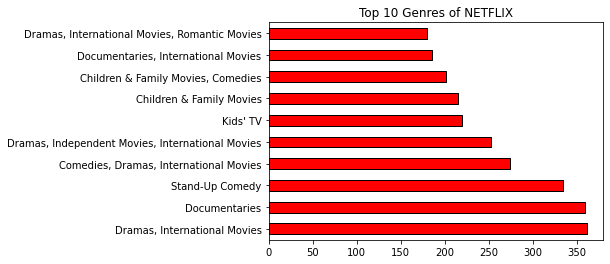

In [6]:
df["listed_in"].value_counts()[:10].plot(kind="barh", color="red", edgecolor='black')
plt.title("Top 10 Genres of NETFLIX");

Top ten rating of the content listed, present in Netflix.

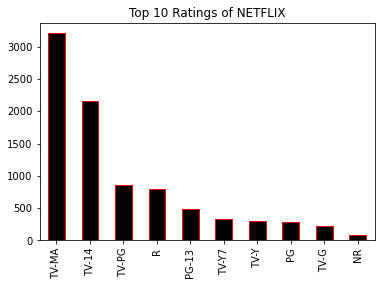

In [7]:
df["rating"].value_counts()[:10].plot(kind="bar", color="black", edgecolor='red')
plt.title("Top 10 Ratings of NETFLIX");

# <center>3. Data Cleaning</center>

Changing the datatype of date_added to datetime

In [8]:
pd.to_datetime(df['date_added'])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


We Drop the Cast and directors columns; as they are not significant in our study now. The country column which is significant, the null values shall be filled.

In [10]:
df.drop(['director', 'cast'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   country       7976 non-null   object        
 4   date_added    8797 non-null   datetime64[ns]
 5   release_year  8807 non-null   int64         
 6   rating        8803 non-null   object        
 7   duration      8804 non-null   object        
 8   listed_in     8807 non-null   object        
 9   description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 688.2+ KB


To find out the number of nun unique values in each category.

From the code below; we see that there are two data types...i.e Movie and Tv shows. and from the plot of distribution of tvshows vs movies, 

we saw that there is a large variance between the two, hence we divide the data into the two types for analysis to avoid bias. 

In [11]:
df.nunique()

show_id         8807
type               2
title           8804
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# TV Shows
We start our Data Cleaning & Analysis with Tv Shows<br>
Make a copy of the original dataframe and call it df1

In [12]:
df1 = df.copy()
df1 = df1[df1['type'] == 'TV Show']

df1.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [13]:
df1[df1['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,NaN,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
...,...,...,...,...,...,...,...,...,...,...
8679,s8680,TV Show,ViR: The Robot Boy,NaN,2018-03-31,2013,TV-Y7,2 Seasons,Kids' TV,Humanoid robot boy ViR lives with his inventor...
8690,s8691,TV Show,Wake Up,NaN,2018-03-31,2017,TV-14,2 Seasons,"International TV Shows, TV Dramas","After taking the blame for a patient death, an..."
8783,s8784,TV Show,Yoko,NaN,2018-06-23,2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


We forward fill(ffill) the na values of the country assuming that the data was acquired chronologically per country. forward fill takes the last value preceding the null value and fills it.We use axis 0 to take in te first country, for places with multiple countries in the list. 

We then run the syntax is null to see if the results have been effective. And it returns an empty dataframe. 

In [14]:
df1['country'] = df1['country'].ffill(axis=0)
df1[df1['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [15]:
df1[df1['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."


at function is similar to the iloc and loc for identiifying a particular cell and then filling in with the desired output. 

In this case, since the null values are only 2, It was wise to google and manually fill in the data using the at. function. 

In [17]:
df1.at[6827,'rating'] = 'TV-14'
df1.at[7312,'rating'] = 'TV-MA'
df1[df1['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


The date_added still has 10 null values. 

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2676 non-null   object        
 1   type          2676 non-null   object        
 2   title         2676 non-null   object        
 3   country       2676 non-null   object        
 4   date_added    2666 non-null   datetime64[ns]
 5   release_year  2676 non-null   int64         
 6   rating        2674 non-null   object        
 7   duration      2676 non-null   object        
 8   listed_in     2676 non-null   object        
 9   description   2676 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 230.0+ KB


We drop the null values of the specific column of date added. 

In [18]:
df1 = df1.dropna(axis=0, subset=['date_added'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1 to 8803
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2666 non-null   object        
 1   type          2666 non-null   object        
 2   title         2666 non-null   object        
 3   country       2666 non-null   object        
 4   date_added    2666 non-null   datetime64[ns]
 5   release_year  2666 non-null   int64         
 6   rating        2666 non-null   object        
 7   duration      2666 non-null   object        
 8   listed_in     2666 non-null   object        
 9   description   2666 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 229.1+ KB


Our data is pretty much clean.


The only problem we might face is the country column that has more than one value in it. Since there are about 500 columns having the country with more than one country, we split the columns, then create a new column having only one country and choosing the first country as the country_made. 

Step 1. create an empty column to a dataframe

In [19]:
df1['country_made'] = df1.apply(lambda _: '', axis=1)
df1

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,country_made
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",
2,s3,TV Show,Ganglands,South Africa,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,
3,s4,TV Show,Jailbirds New Orleans,South Africa,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,
5,s6,TV Show,Midnight Mass,India,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,
...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,"Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,
8796,s8797,TV Show,Yunus Emre,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",
8797,s8798,TV Show,Zak Storm,"United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,
8800,s8801,TV Show,Zindagi Gulzar Hai,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",


Step 2. Fill the new column with the Values from splitinng the country column by delimiter.

In [20]:
df1['country_made'] = [x.split(',')[-0] for x in df1['country']]
df1

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,country_made
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,South Africa,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,South Africa
3,s4,TV Show,Jailbirds New Orleans,South Africa,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",South Africa
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
5,s6,TV Show,Midnight Mass,India,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,India
...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,"Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,Japan
8796,s8797,TV Show,Yunus Emre,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",Turkey
8797,s8798,TV Show,Zak Storm,"United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,United States
8800,s8801,TV Show,Zindagi Gulzar Hai,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",Pakistan


# <center>Analysis and Visualization</center>

## Statistical Analysis

In [21]:
df1['duration'].mode()

0    1 Season
Name: duration, dtype: object

In [22]:
df1['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [23]:
df1['listed_in'].mode()

0    Kids' TV
Name: listed_in, dtype: object

In [24]:
df1['country_made'].mode()

0    United States
Name: country_made, dtype: object

### Visualization

Top 10 Genres of TV Shows

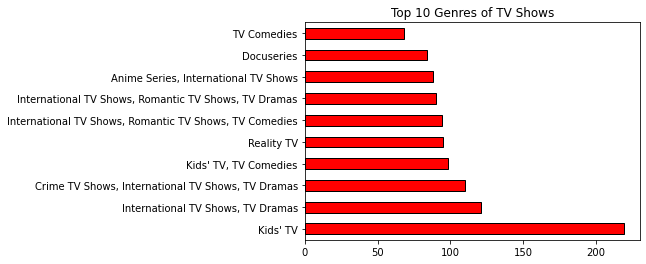

In [25]:
df1["listed_in"].value_counts()[:10].plot(kind="barh", color="red", edgecolor='black')
plt.title("Top 10 Genres of TV Shows");

Top 10 Ratings of TV Shows

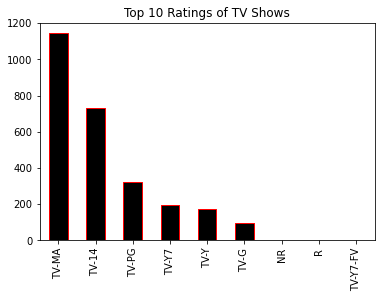

In [26]:
df1["rating"].value_counts()[:10].plot(kind="bar", color="black", edgecolor='red')
plt.title("Top 10 Ratings of TV Shows");

 # <center>Word Cloud TV Show</center>

In [27]:
from wordcloud import WordCloud

### Word Cloud for Country

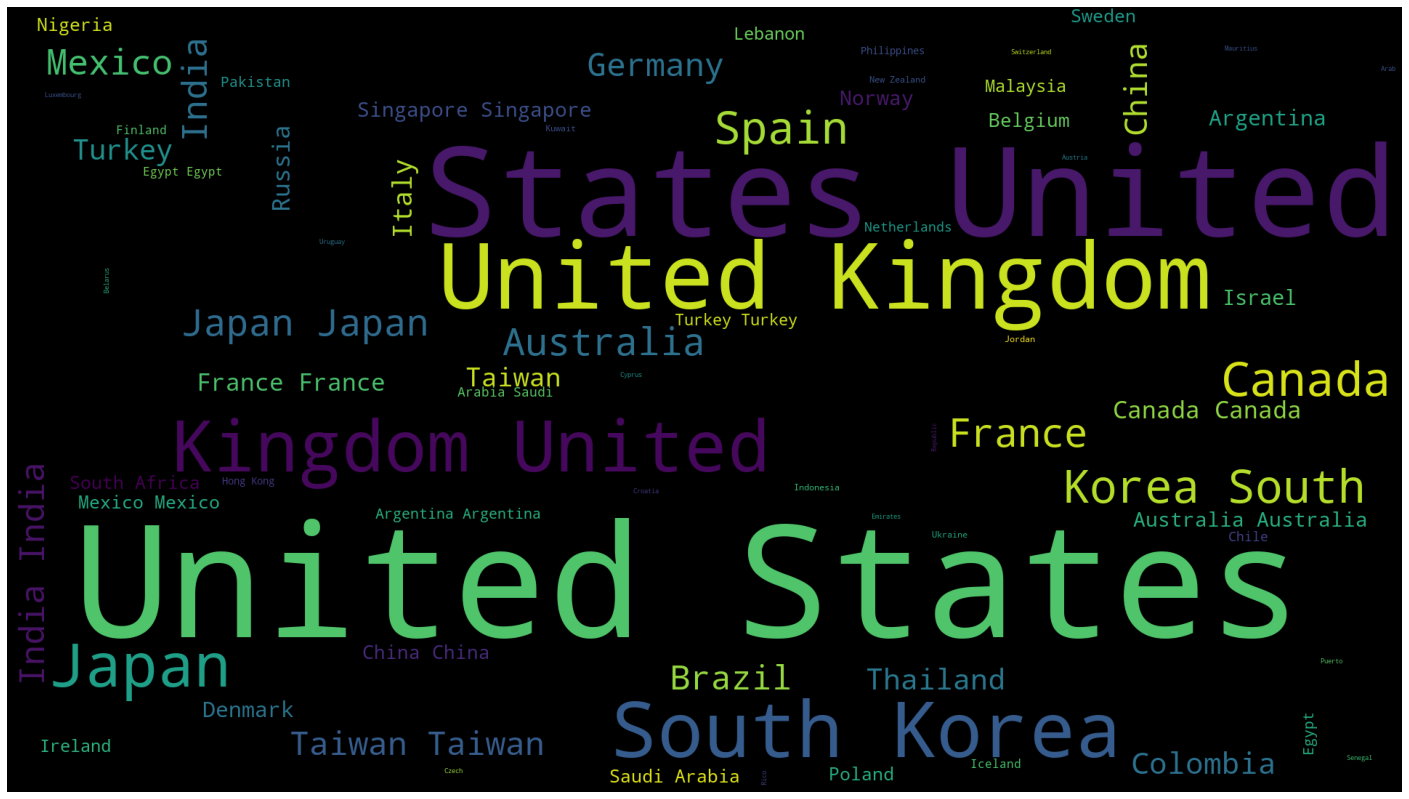

In [28]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df1.country_made))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country_made.png')
plt.show()

### Word Cloud for Title

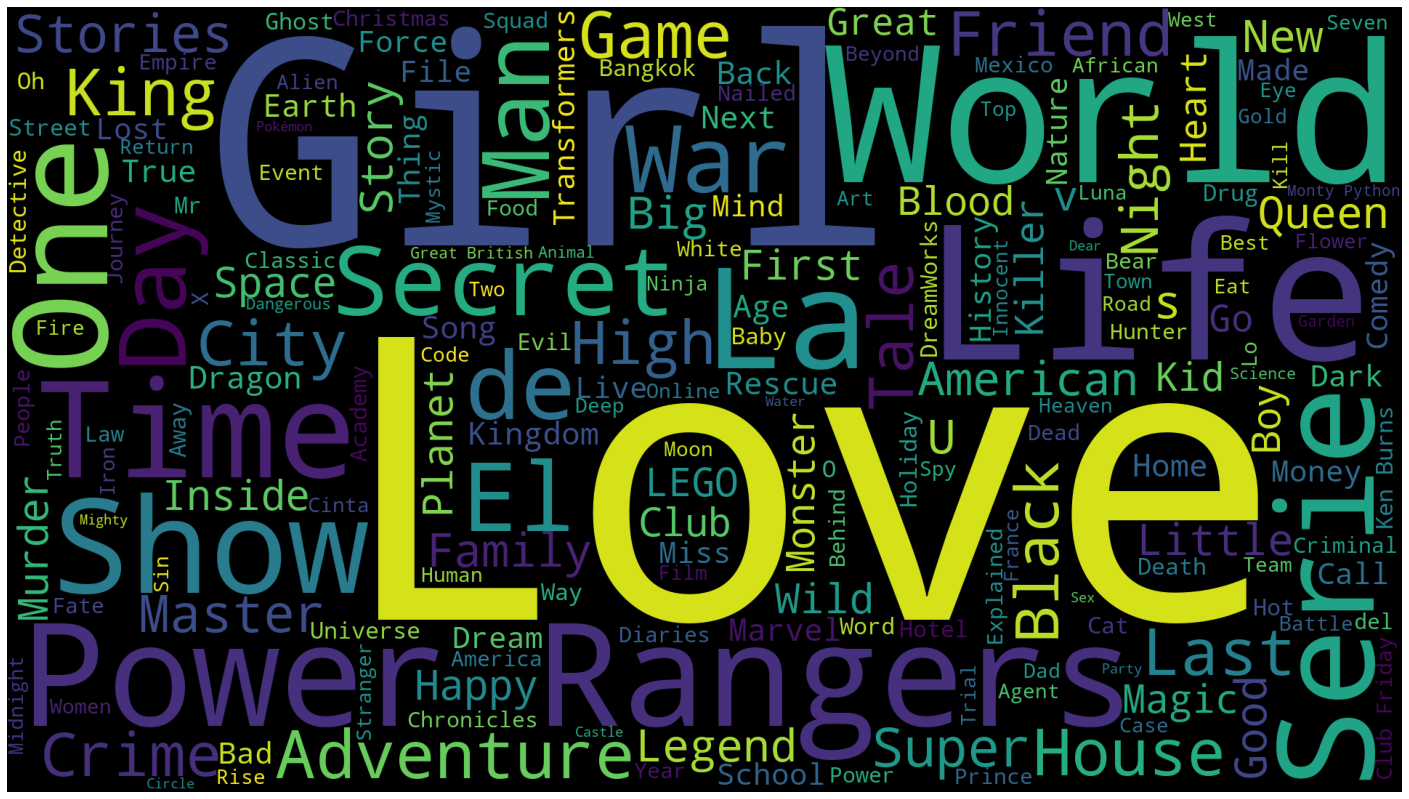

In [29]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df1.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('title.png')
plt.show()

In [30]:
df1.to_csv('TVshows.csv', index = False)

# Movies
Data Cleaning & Analysis of Movies 

In [31]:
df2 = df.copy()
df2 = df2[df2['type'] == 'Movie']

df2.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [32]:
df2[df2['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
13,s14,Movie,Confessions of an Invisible Girl,NaN,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
18,s19,Movie,Intrusion,NaN,2021-09-22,2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
22,s23,Movie,Avvai Shanmughi,NaN,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
...,...,...,...,...,...,...,...,...,...,...
8585,s8586,Movie,Three-Quarters Decent,NaN,2019-06-20,2010,TV-14,96 min,"Comedies, Dramas, International Movies","Determined to fight corruption in his country,..."
8602,s8603,Movie,Tom and Jerry: The Magic Ring,NaN,2019-12-15,2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...
8622,s8623,Movie,Tremors 2: Aftershocks,NaN,2020-01-01,1995,PG-13,100 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",A rag-tag team of survivalists and scientists ...
8718,s8719,Movie,Westside vs. the World,NaN,2019-08-09,2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...


We forward fill(ffill) the na values of the country assuming that the data was acquired chronologically per country. forward fill takes the last value preceding the null value and fills it.We use axis 0 to take in te first country, for places with multiple countries in the list.

We then run the syntax is null to see if the results have been effective. And it returns an empty dataframe.

In [33]:
df2['country'] = df2['country'].ffill(axis=0)
df2[df2['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [34]:
df2[df2['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
7537,s7538,Movie,My Honor Was Loyalty,Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


at function is similar to the iloc and loc for identiifying a particular cell and then filling in with the desired output.

In this case, since the null values are only 2, It was wise to google and manually fill in the data using the at. function.

In [35]:
df2.at[5989,'rating'] = 'TV-PG'
df2.at[7537,'rating'] = 'TV-MA'
df2[df2['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


The date_added still has 10 null values.

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   country       6131 non-null   object        
 4   date_added    6131 non-null   datetime64[ns]
 5   release_year  6131 non-null   int64         
 6   rating        6131 non-null   object        
 7   duration      6128 non-null   object        
 8   listed_in     6131 non-null   object        
 9   description   6131 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 655.9+ KB


We drop the null values of the specific column of the 3 null values in duration.

In [37]:
df2 = df2.dropna(axis=0, subset=['duration'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6128 non-null   object        
 1   type          6128 non-null   object        
 2   title         6128 non-null   object        
 3   country       6128 non-null   object        
 4   date_added    6128 non-null   datetime64[ns]
 5   release_year  6128 non-null   int64         
 6   rating        6128 non-null   object        
 7   duration      6128 non-null   object        
 8   listed_in     6128 non-null   object        
 9   description   6128 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 526.6+ KB


Our data is clean.

The only problem we might face is the country column that has more than one value in it therefore choosing the first country as the country_made.

In [38]:
df2['country_made'] = df2.apply(lambda _: '', axis=1)
df2

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,country_made
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",
6,s7,Movie,My Little Pony: A New Generation,United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",


In [39]:
df2['country_made'] = [x.split(',')[-0] for x in df2['country']]
df2

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,country_made
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
6,s7,Movie,My Little Pony: A New Generation,United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,United States
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,United States
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Germany
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,United Arab Emirates
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States


# <center>Analysis and Visualization</center>

## Statistical Analysis

In [40]:
df2['duration'].mode()

0    90 min
Name: duration, dtype: object

In [41]:
df2['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [42]:
df2['listed_in'].mode()

0    Dramas, International Movies
Name: listed_in, dtype: object

In [43]:
df2['country_made'].mode()

0    United States
Name: country_made, dtype: object

### Vizualization

Top 10 Genres of Movies

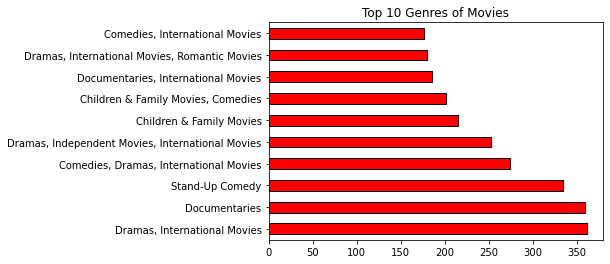

In [44]:
df2["listed_in"].value_counts()[:10].plot(kind="barh", color="red", edgecolor='black')
plt.title("Top 10 Genres of Movies");

Top 10 Ratings of Movies

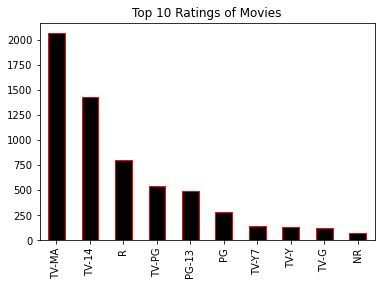

In [45]:
df2["rating"].value_counts()[:10].plot(kind="bar", color="black", edgecolor='red')
plt.title("Top 10 Ratings of Movies");

# <center>Word Cloud Movie</center>

### Word Cloud for Country

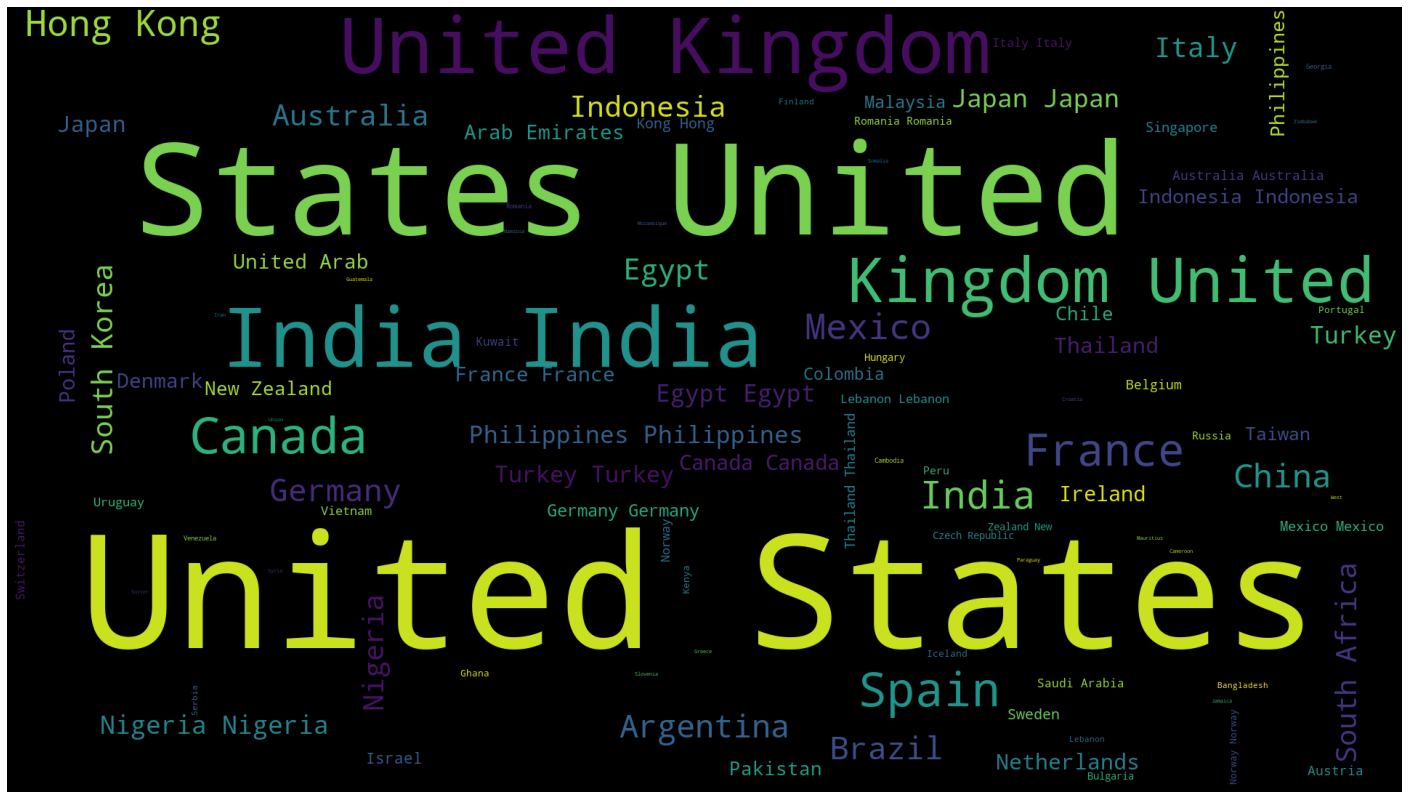

In [46]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df2.country_made))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country_made.png')
plt.show()

### Word Cloud for Title

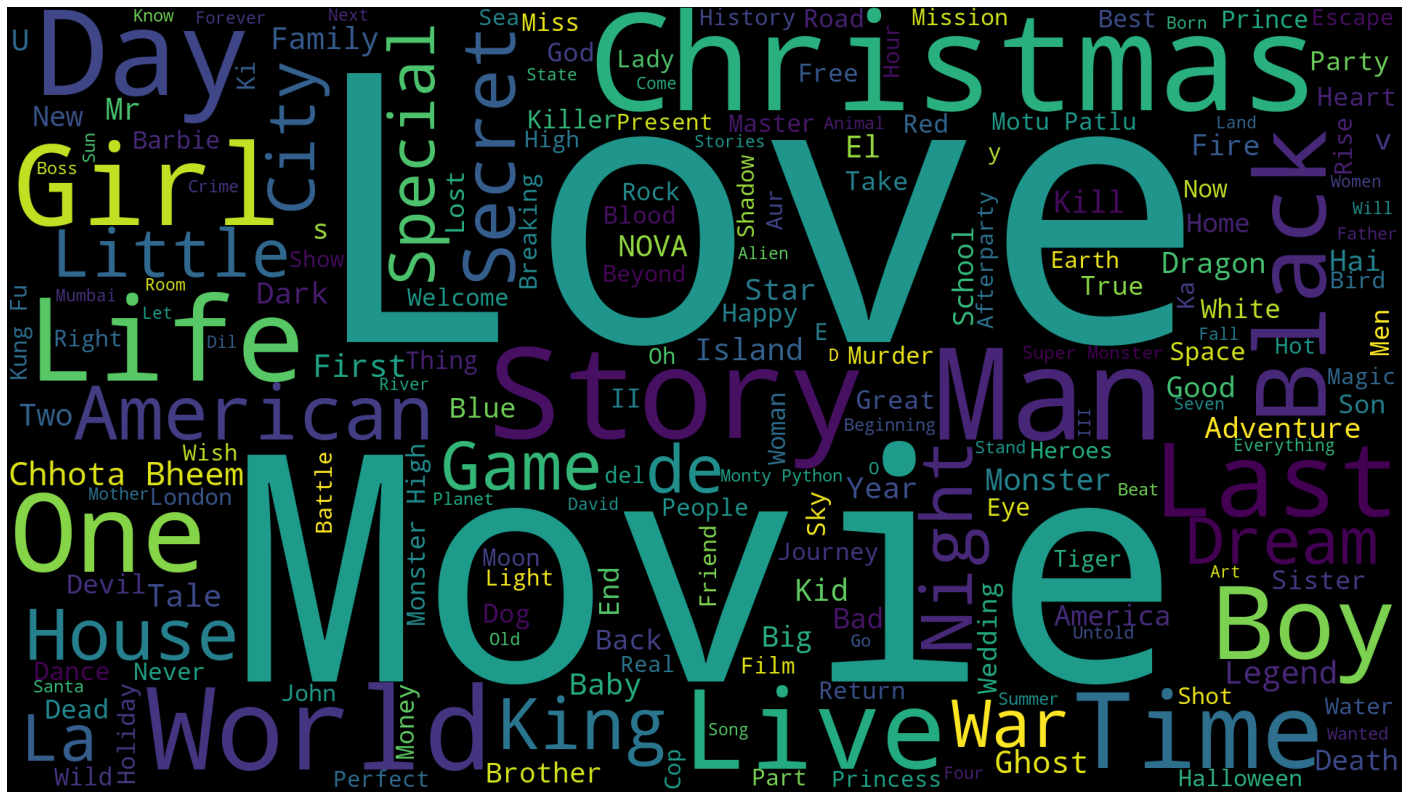

In [47]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df2.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('title.png')
plt.show()

In [48]:
df2.to_csv('Movies.csv', index = False)